# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_train.head().T

,0,1,2,3,4
AGREEMENT_RK,59910150,59910230,59910525,59910803,59911781
TARGET,0,0,0,0,0
AGE,49,32,52,39,30
SOCSTATUS_WORK_FL,1,1,1,1,1
SOCSTATUS_PENS_FL,0,0,0,0,0
GENDER,1,1,1,1,0
CHILD_TOTAL,2,3,4,1,0
DEPENDANTS,1,3,0,1,0
EDUCATION,Среднее специальное,Среднее,Неполное среднее,Высшее,Среднее
MARITAL_STATUS,Состою в браке,Состою в браке,Состою в браке,Состою в браке,Состою в браке


In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [8]:
df_test.shape

(14910, 52)

In [9]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [11]:
df = df_test.append(df_train).reset_index(drop=True)

In [12]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [14]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Среднее', 'Среднее специальное', 'Неоконченное высшее', 'Высшее', 'Ученая степень', 'Неполное среднее'}


MARITAL_STATUS
{'Разведен(а)', 'Не состоял в браке', 'Состою в браке', 'Гражданский брак', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Государственная служба', 'Информационные услуги', 'Юридические услуги/нотариальные услуги', 'Химия/Парфюмерия/Фармацевтика', 'Логистика', 'Другие сферы', 'Туризм', 'Банк/Финансы', 'Управляющая компания', 'Информационные технологии', 'Энергетика', 'Металлургия/Промышленность/Машиностроение', 'Салоны красоты и здоровья', 'Маркетинг', 'Нефтегазовая промышленность', 'СМИ/Реклама/PR-агенства', 'Развлечения/Искусство', 'Наука', 'Строительство', 'ЧОП/Детективная д-ть', 'Подбор персонала', 'Страхование', 'Транспорт', 'Торговля', 'Образование', 'Здравоохранение', 'Коммунальное хоз-во/Дорожные службы', 'Сборочные производства', 'Недвижимость', 'Ресторанный бизнес/Общественное питание', 'Сельское хозяйство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [15]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [16]:
df.loc[:, 'ORG_TP_STATE'].nunique()

5

In [17]:
df.loc[:, 'ORG_TP_STATE'].value_counts()

Частная компания                  12896
Государственная комп./учреж.      12152
Индивидуальный предприниматель     1882
Некоммерческая организация          445
Частная ком. с инос. капиталом       45
Name: ORG_TP_STATE, dtype: int64

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [18]:
for name in df.columns:
    s = str('')
    s += name
    if type(df[name][0] == str):
        print(s)
        
#OneHotEncoding
#df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

AGREEMENT_RK
TARGET
AGE
SOCSTATUS_WORK_FL
SOCSTATUS_PENS_FL
GENDER
CHILD_TOTAL
DEPENDANTS
EDUCATION
MARITAL_STATUS
GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
FAMILY_INCOME
PERSONAL_INCOME
REG_ADDRESS_PROVINCE
FACT_ADDRESS_PROVINCE
POSTAL_ADDRESS_PROVINCE
TP_PROVINCE
REGION_NM
REG_FACT_FL
FACT_POST_FL
REG_POST_FL
REG_FACT_POST_FL
REG_FACT_POST_TP_FL
FL_PRESENCE_FL
OWN_AUTO
AUTO_RUS_FL
HS_PRESENCE_FL
COT_PRESENCE_FL
GAR_PRESENCE_FL
LAND_PRESENCE_FL
CREDIT
TERM
FST_PAYMENT
DL_DOCUMENT_FL
GPF_DOCUMENT_FL
FACT_LIVING_TERM
WORK_TIME
FACT_PHONE_FL
REG_PHONE_FL
GEN_PHONE_FL
LOAN_NUM_TOTAL
LOAN_NUM_CLOSED
LOAN_NUM_PAYM
LOAN_DLQ_NUM
LOAN_MAX_DLQ
LOAN_AVG_DLQ_AMT
LOAN_MAX_DLQ_AMT
PREVIOUS_CARD_NUM_UTILIZED
sample


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [19]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop(["AGREEMENT_RK"], axis=1)
    df_output = df_output.drop(['EDUCATION','GEN_INDUSTRY',\
                                'GEN_TITLE','ORG_TP_STATE',\
                                'JOB_DIR','FAMILY_INCOME','REG_ADDRESS_PROVINCE',\
                                'FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE',\
                                'TP_PROVINCE','REGION_NM'], axis=1)
    #df_output.loc[:, ['PERSONAL_INCOME','CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']] = \
    #df_output.loc[:, ['PERSONAL_INCOME','CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']].map(lambda x: x.replace(',', '.')).astype('float')
    #.replace(',', '.')#.astype('float')
    #df_output[['PERSONAL_INCOME','CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    df_output['ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL'].fillna('Без участия')
    
    df_output['WORK_TIME'] = df_output['WORK_TIME'].median()
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].median()
    
    df_output = pd.get_dummies(df_output, columns=['MARITAL_STATUS', 'ORG_TP_FCAPITAL'])
    
    return df_output

In [20]:
#print(set(preproc_data(df)['ORG_TP_FCAPITAL']))

In [21]:
preproc_data(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 46 columns):
TARGET                               30133 non-null int64
AGE                                  30133 non-null int64
SOCSTATUS_WORK_FL                    30133 non-null int64
SOCSTATUS_PENS_FL                    30133 non-null int64
GENDER                               30133 non-null int64
CHILD_TOTAL                          30133 non-null int64
DEPENDANTS                           30133 non-null int64
PERSONAL_INCOME                      30133 non-null float64
REG_FACT_FL                          30133 non-null int64
FACT_POST_FL                         30133 non-null int64
REG_POST_FL                          30133 non-null int64
REG_FACT_POST_FL                     30133 non-null int64
REG_FACT_POST_TP_FL                  30133 non-null int64
FL_PRESENCE_FL                       30133 non-null int64
OWN_AUTO                             30133 non-null int64
AUTO_RUS_FL        

In [22]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [23]:
#X, y = df_preproc.iloc[:, :-1].values, df_preproc.iloc[:, -1].values
X, y = df_train_preproc.drop(['TARGET'], axis=1).values, df_train_preproc.TARGET.values

#### Задание 5. Обучение и оценка качества разных моделей

In [24]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_train, X_test, y_train, y_test = \
train_test_split(X,y,test_size=0.3,random_state=42)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
#!pip3 install pydot
#!dot -Tpng '../../img/small_tree.dot' -o '../../img/small_tree.png'

In [168]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from ipywidgets import interact, IntSlider

#model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=123)
#model_RF = RandomForestClassifier(criterion='entropy', max_depth=8, random_state=123)
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=123)
model_RF = RandomForestClassifier(criterion='entropy', max_depth=8, random_state=123)
model_LR = LogisticRegression(random_state=123)

model_DT.fit(X_train,y_train)
model_RF.fit(X_train,y_train)
model_LR.fit(X_train,y_train)

DT_y_hat = model_DT.predict(X_train)
DT_y_hat_proba = model_DT.predict_proba(X_train, )
RF_y_hat = model_RF.predict(X_train)
RF_y_hat_proba = model_RF.predict_proba(X_train, )
LR_y_hat = model_LR.predict(X_train)
LR_y_hat_proba = model_LR.predict_proba(X_train, )


In [169]:
print(roc_auc_score(y_train, DT_y_hat_proba[:, 1]))
print(roc_auc_score(y_train, RF_y_hat_proba[:, 1]))
print(roc_auc_score(y_train, LR_y_hat_proba[:, 1]))

0.7649567994293135
0.7832123087621756
0.6451860220069452


In [170]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz

#export_graphviz(tree, feature_names=['x1', 'x2'], 
#out_file='../../img/small_tree.dot', filled=True)

#export_graphviz(tree, feature_names=['x1', 'x2'], out_file=None, filled=True)
export_graphviz(tree, out_file=None, filled=True)

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="X[0] <= 42.5\\nentropy = 0.527\\nsamples = 15223\\nvalue = [13411, 1812]", fillcolor="#e58139dd"] ;\n1 [label="X[6] <= 14650.0\\nentropy = 0.598\\nsamples = 8854\\nvalue = [7567, 1287]", fillcolor="#e58139d4"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[21] <= 240.5\\nentropy = 0.529\\nsamples = 5043\\nvalue = [4438, 605]", fillcolor="#e58139dc"] ;\n1 -> 2 ;\n3 [label="X[24] <= 11.5\\nentropy = 0.772\\nsamples = 406\\nvalue = [314, 92]", fillcolor="#e58139b4"] ;\n2 -> 3 ;\n4 [label="X[34] <= 1069.37\\nentropy = 0.292\\nsamples = 39\\nvalue = [37, 2]", fillcolor="#e58139f1"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 35\\nvalue = [35, 0]", fillcolor="#e58139ff"] ;\n4 -> 5 ;\n6 [label="X[10] <= 0.5\\nentropy = 1.0\\nsamples = 4\\nvalue = [2, 2]", fillcolor="#e5813900"] ;\n4 -> 6 ;\n7 [label="entropy = 0.0\\nsamples = 2\\nvalue = [2, 0]", fillcolor="#e58139ff"] ;\n6 -> 7 ;

In [171]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve

#print('roc_auc_score:' + str(roc_auc_score(y_test, DT_y_hat_proba[:, 1])))
#print('accuracy_score:' + str(accuracy_score(y_test, DT_y_hat)))
#print('precision_score:' + str(precision_score(y_test, DT_y_hat)))
#print('recall_score:' + str(recall_score(y_test, DT_y_hat)))

l_DT = [(accuracy_score(y_train, DT_y_hat)), (precision_score(y_train, DT_y_hat)), (recall_score(y_train, DT_y_hat))]
l_RF = [(accuracy_score(y_train, RF_y_hat)), (precision_score(y_train, RF_y_hat)), (recall_score(y_train, RF_y_hat))]
l_LR = [(accuracy_score(y_train, LR_y_hat)), (precision_score(y_train, LR_y_hat)), (recall_score(y_train, LR_y_hat))]

In [172]:
accuracy_score(y_train, DT_y_hat)

0.8903903903903904

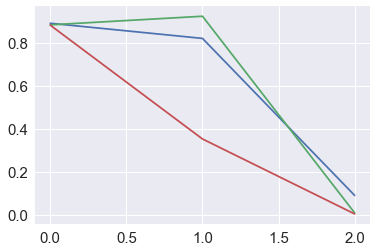

In [173]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

plt.plot(l_DT, label = 'l_DT')
plt.plot(l_RF, label = 'l_RF')
plt.plot(l_LR, label = 'l_LR')

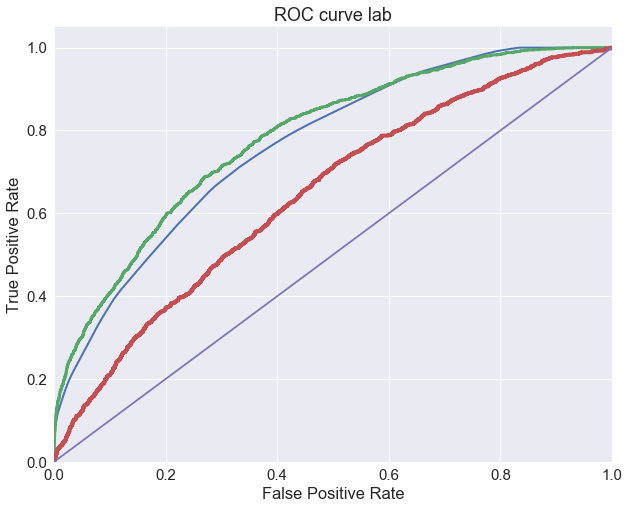

In [174]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

import seaborn as sns

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
DT_fpr, DT_tpr, DT_thresholds = roc_curve(y_train, DT_y_hat_proba[:, 1], pos_label=1)
RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_train, RF_y_hat_proba[:, 1], pos_label=1)
LR_fpr, LR_tpr, LR_thresholds = roc_curve(y_train, LR_y_hat_proba[:, 1], pos_label=1)
plt.plot(DT_fpr, DT_tpr, lw=2, label='DT_ ROC curve')
plt.plot(RF_fpr, RF_tpr, lw=3, label='RF_ ROC curve')
plt.plot(LR_fpr, LR_tpr, lw=4, label='LR_ ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve lab')
#plt.savefig("ROC.png")
plt.show()

In [175]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(model_DT, X_train, y_train, cv = 10)
itog_val = pd.DataFrame([['DecisionTreeClassifier',scores.mean()]], columns=['model', 'scores'])
#itog_val['DecisionTreeClassifier'] = scores.mean()

scores = cross_val_score(model_RF, X_train, y_train, cv = 10)
itog_val = itog_val.append(pd.DataFrame([['RandomForestClassifier',scores.mean()]], columns=['model', 'scores']))

scores = cross_val_score(model_LR, X_train, y_train, cv = 10)
itog_val = itog_val.append(pd.DataFrame([['LogisticRegression',scores.mean()]], columns=['model', 'scores']))

In [176]:
itog_val.head()

,model,scores
0,DecisionTreeClassifier,0.873310
0,RandomForestClassifier,0.881851
0,LogisticRegression,0.881663


[]

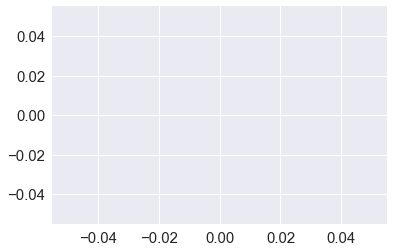

In [177]:
plt.plot(x=itog_val['model'], y=itog_val['scores'], kind='bar')

In [178]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

predict = model_RF.predict_proba(X_test, )

In [179]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

roc_auc_score(y_test, predict[:, 1])

0.65049401345513

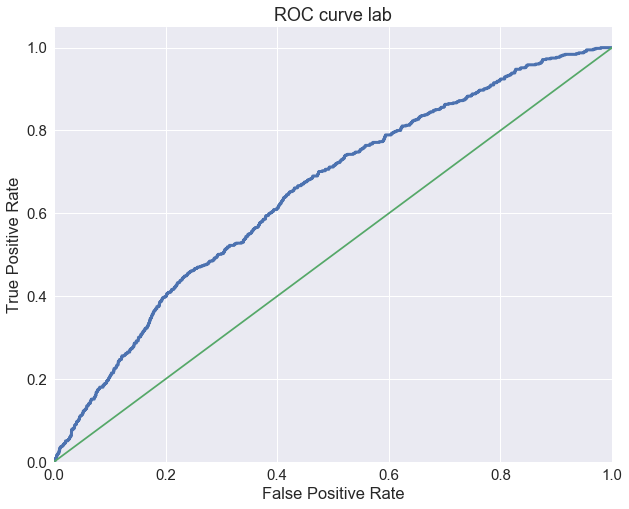

In [180]:
plt.figure(figsize=(10, 8))
RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_test, predict[:, 1], pos_label=1)
plt.plot(RF_fpr, RF_tpr, lw=3, label='RF_ ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve lab')
plt.show()

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)